This code reads parameters from 'initial_parameters.py' and quantitiy results from 'averaged_quantities_of_100_simulations.dat' and makes plots.

# Import parameters

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
import csv
import os

#load parameters
import initial_parameters

Monomers = initial_parameters.Monomers
gamma = initial_parameters.gamma
Bonds = initial_parameters.Bonds
Kuhn_length_b = initial_parameters.Kuhn_length_b
tau_rouse_theory = initial_parameters.tau_rouse_theory
density_passive_particles = initial_parameters.density_passive_particles
kT = initial_parameters.kT

In [2]:
#make path to 'results/current_datetime' to save all analysis
path_results = ''

In [3]:
#create lists for quantities for graphical representation (plots)
list_of_times = []
list_of_sq_end_to_end_distances = []
list_of_sq_distance_of_cm = []
list_of_auto_corr_ee_vector = []

#load averaged quantities and write into lists
averaged_quantities = open(path_results+'averaged_quantities_of_100_simulations.dat','r')
lines = csv.reader(averaged_quantities, delimiter='	')

for line in lines:

    #time is already written into array (stays the same)
    list_of_times.append(float(line[0]))
    list_of_sq_end_to_end_distances.append(float(line[1]))
    list_of_sq_distance_of_cm.append(float(line[2]))
    list_of_auto_corr_ee_vector.append(float(line[3]))

#divide (average) quantities arrays by number_of_simulations
list_of_times = np.array(list_of_times)
list_of_sq_end_to_end_distances = np.array(list_of_sq_end_to_end_distances)
list_of_sq_distance_of_cm = np.array(list_of_sq_distance_of_cm)
list_of_auto_corr_ee_vector = np.array(list_of_auto_corr_ee_vector)

averaged_quantities.close()

In [4]:
#set plot parameters

#change figure size
figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 9
figure_size[1] = 6
plt.rcParams['figure.figsize'] = figure_size

#set line width
plt.rcParams['lines.linewidth'] = 4

#set label size in the plots
plt.rcParams.update({'font.size': 18})

mean for t>=6*tau_Rouse: [49.53835453]
mean for t>=6*tau_Rouse: 49.538354529468904 +/- 4.084740265054589


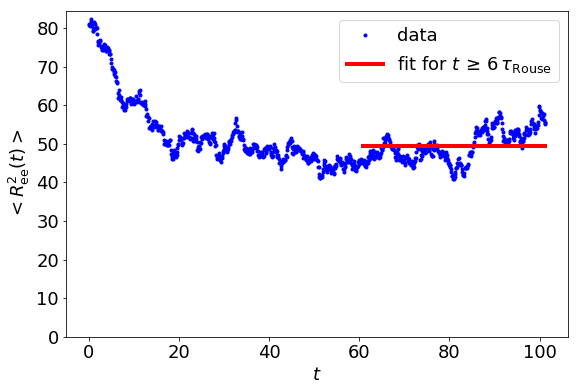

In [5]:
#plot squared end-to-end distance as function of time

#convert array into numpy array and use short names (np.array(np.array(list)) is still np.array)
t = np.array(list_of_times)
y = np.array(list_of_sq_end_to_end_distances)

t_after_6_tau_rouse = t[int(len(y)/10*6):]
y_after_6_tau_rouse = y[int(len(y)/10*6):]

#define fit function; take independent variable as first argument
def func_sq_end_to_end_distance(t_after_6_tau_rouse, const):
    return const + t_after_6_tau_rouse*0

#fit the curve using function, t-values and y-values; return: optimal parameters and covariances
popt, pcov = curve_fit(func_sq_end_to_end_distance, t_after_6_tau_rouse, y_after_6_tau_rouse)

#calculate standard deviation from estimated covariance
#for constant function as above, this deviation is calculated in a wrong way
#so, do not use perr = np.sqrt(np.diag(pcov))

#plot the results
plt.plot(t, y, 'b.', label='data')

#plot linear fit
plt.plot(t_after_6_tau_rouse, func_sq_end_to_end_distance(t_after_6_tau_rouse, *popt),
         'r-', label=(r'fit for $t\,\geq\,6\,\tau_{\mathrm{Rouse}}$'))

print ("mean for t>=6*tau_Rouse: "+str(popt))
print ("mean for t>=6*tau_Rouse: "+str(np.mean(y_after_6_tau_rouse))+
       " +/- "+str(np.std(y_after_6_tau_rouse)))

#save averaged R_ee
R_ee_final = np.mean(y_after_6_tau_rouse)
R_ee_final_err = np.std(y_after_6_tau_rouse)

#set y range due to use of log-representation (otherwise y axis starts at extremely small values)
plt.ylim(0, None)

#save the plot
plt.legend(loc='best')
plt.xlabel(r'$t$')
plt.ylabel(r'$< R_{\mathrm{ee}}^2(t) >$')
plt.draw()
plt.savefig(path_results+'sq_end_to_end_distance.png')
plt.show()
plt.close()

The plot above shows the change in squared end-to-end distance of the polymer.

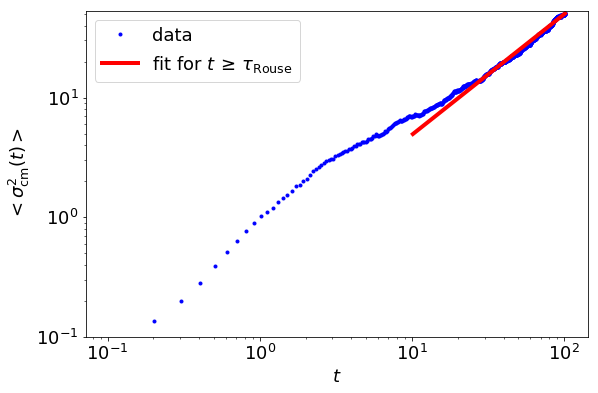

In [6]:
#plot squared motion of center of mass

#covert arrays into numpy arrays and use short names (use t and y)
t = np.array(list_of_times)
y = np.array(list_of_sq_distance_of_cm)

#find index of time array so that the corresponding time is close to rouse_time
index_tau_rouse = (np.abs(t - tau_rouse_theory)).argmin()

t_after_tau_rouse = t[index_tau_rouse:]
y_after_tau_rouse = y[index_tau_rouse:]

#define fit function; take independent variable as first argument
def func_motion_of_cm(t_after_tau_rouse, const_cm, alpha):
    return const_cm*(t_after_tau_rouse**alpha)

#fit the curve using function, t-values and y-values; return: optimal parameters and covariances
popt, pcov = curve_fit(func_motion_of_cm, t_after_tau_rouse, y_after_tau_rouse)

#calculate standard deviation from estimated covariance
perr = np.sqrt(np.diag(pcov))

#safe diffusion constant D
D_final = popt[0]/6
D_final_err = perr[0]/6

#safe diffusion exponent alpha
diffusion_exponent = popt[1]
diffusion_exponent_error = perr[1]

#plot the results
plt.plot(t, y, 'b.', label='data')
plt.plot(t_after_tau_rouse, func_motion_of_cm(t_after_tau_rouse, *popt),
         'r-', label=(r'fit for $t\,\geq\,\tau_{\mathrm{Rouse}}$'))

#save the plot
plt.legend(loc='best')

#set y range due to use of log-representation (otherwise y axis starts at extremely small values)
plt.ylim(0.1, None)

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$t$')
plt.ylabel(r'$< \sigma_{\mathrm{cm}}^2(t) >$')
plt.draw()
plt.savefig(path_results+'sq_distance_of_cm.png')
plt.show()
plt.close()

The plot above shows the motion of center of mass. Represented is the squared distance between current and initial position of center of mass. The red line is the fit. It is $\sigma\,\propto\,const.\,t^\alpha$.

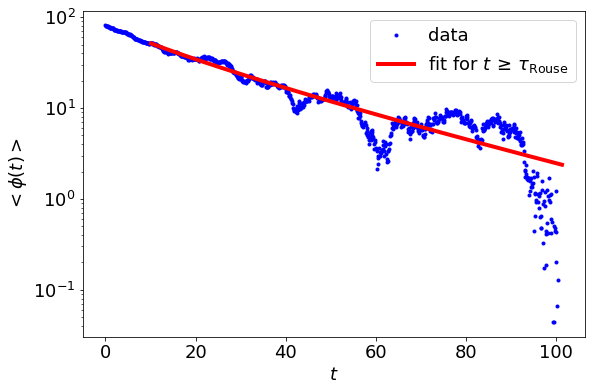

rouse time (simulation) = 21.94618024558442 +/- 1.1823851473160705


In [7]:
#plot auto-correlation end-to-end vector as function of time

#covert arrays into numpy arrays and use short names (full=all values)
t = np.array(list_of_times)
y = np.array(list_of_auto_corr_ee_vector)

#find index of time array so that the corresponding time is close to rouse_time
index_tau_rouse = (np.abs(t - tau_rouse_theory)).argmin()

#use 'valid' points for fit (after relaxation time)
t_valid = t[index_tau_rouse:]
y_valid = y[index_tau_rouse:]

#define fit function; take independent variable as first argument
def func_auto_corr_ee_vec(t, const_auto_corr, inverse_tau_rouse, alpha):
    
    #use instead of 1/tau_rouse inverse_tau_rouse, otherwise fit fails
    return const_auto_corr*np.exp(-((t*inverse_tau_rouse)**alpha))

#fit the curve using function, t-values and y-values
#choose 0<const_auto_corr<100 (because max=9*9=81)
#choose 0<inverse_tau_rouse<1 (because t_rouse>1)
#chose 0<alpha<2 (because alpha should be between zero and 1)
popt, pcov = curve_fit(func_auto_corr_ee_vec, t_valid, y_valid,
                       bounds=(0,[100, 1, 2]))

#calculate standard deviation from estimated covariance
perr = np.sqrt(np.diag(pcov))

relaxation_exponent = popt[2]
relaxation_exponent_error = perr[2]

#safe Rouse time
Rouse_time_final = (1/popt[1])
Rouse_time_final_err = (math.sqrt((-1/(popt[1]**2)*perr[1])**2))

#plot the results
plt.plot(t, y, 'b.', label='data')
plt.plot(t_valid, func_auto_corr_ee_vec(t_valid, *popt),
        'r-', label=(r'fit for $t\,\geq\,\tau_{\mathrm{Rouse}}$'))
#plt.plot(t, const_auto_corr*np.exp(-t/tau_rouse_theory),
#'g--', label=('theory; offset depends on initial form of polymer'))

#save plot
plt.legend(loc='best')
plt.xlabel(r'$t$')
plt.yscale('log')
plt.ylabel(r'$< \phi(t) >$')
plt.draw()
plt.savefig(path_results+'auto_corr_ee_vector.png')
plt.show()
plt.close()

print ("rouse time (simulation) = "+str(1/popt[1])+
      " +/- "+str(str(math.sqrt((-1/(popt[1]**2)*perr[1])**2))))

The plot above represents the auto-correlation of end-to-end vector. The auto-correlation decays exponentially with $\phi(t)\,\propto\,\exp(-(t/\tau_{\text{relax}})^\alpha)$. The red line represents the fit for $t\,<\,\tau_{Rouse}$; the Rouse time is always regarded to the ideal chain without excluded volme.

In [8]:
#safe fitted parameter in dependence of density
file_ee_depends_on_N = open('/net/theorie/rocks/niklas.butkevich/Codes/results/'+
                            'N_10/averages_for_plots_different_densities', 'a')
file_ee_depends_on_N.write(str(density_passive_particles)+"	"
                           +str(R_ee_final)+"	"
                           +str(R_ee_final_err)+"	" 
                           +str(D_final)+"	"
                           +str(D_final_err)+"	"
                           +str(diffusion_exponent)+"	"
                           +str(diffusion_exponent_error)+"	"
                           +str(Rouse_time_final)+"	" 
                           +str(Rouse_time_final_err)+"	" 
                           +str(relaxation_exponent)+"	"
                           +str(relaxation_exponent_error)+"\n")
file_ee_depends_on_N.close()